In [11]:
from sklearn.decomposition import PCA
import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

In [2]:
emb = pd.read_csv("../data/yeast_emb_embeddings_yeastnet_genex.csv", index_col=0).set_index("gene_id")

In [3]:
emb_pca = pd.DataFrame(PCA(128).fit_transform(emb), index=emb.index)

In [4]:
classes = pd.read_csv("../data/Costanzo_classes.csv").set_index("gene_id")

In [5]:
dataset = emb.merge(classes, left_index=True, right_index=True)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
classifiers = [
    sklearn.ensemble.RandomForestClassifier(100), 
    sklearn.linear_model.LogisticRegression(max_iter=500)
]

for classifier in classifiers:
    classifier.fit(X_train, y_train)

/Users/lukasveskrna/Developer/Notebooks/yeast-embeddings/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== RandomForestClassifier() ===
Accuracy: 0.9857328145265889
Precision: 0.9818181818181818
Recall: 0.9230769230769231
F1 score: 0.9515418502202643
Info: Ratio of non-essential genes in the dataset: 0.8491591203104787
=== LogisticRegression(max_iter=500) ===
Accuracy: 0.867704280155642
Precision: 0.5773195876288659
Recall: 0.47863247863247865
F1 score: 0.5233644859813084
Info: Ratio of non-essential genes in the dataset: 0.8491591203104787


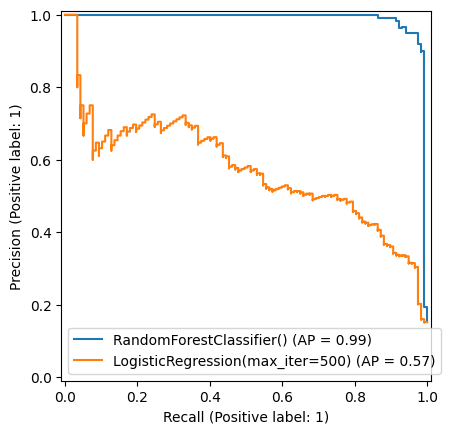

In [15]:
fig, ax = plt.subplots()

for classifier in classifiers:
    print("===", classifier, "===")
    y_pred = classifier.predict(X_test)

    print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
    print("Precision:", sklearn.metrics.precision_score(y_test, y_pred))
    print("Recall:", sklearn.metrics.recall_score(y_test, y_pred))
    print("F1 score:", sklearn.metrics.f1_score(y_test, y_pred))
    print("Info: Ratio of non-essential genes in the dataset:", (classes == 0).sum().iloc[0]/len(classes))

    y_proba = classifier.predict_proba(X_test)[:, 1]
    display = PrecisionRecallDisplay.from_predictions(y_test, y_proba, ax=ax, name=str(classifier))
